# **Time Series**

Steps for calculating the time series
1. Data Ingestion
1. EDA of the data
1. Processing of the data
1. model building
1. model evaluation

## 1. Data Ingestion
Import the required libraries : Import the required libraries sucha as padas, numpy, matplotlib, seaborn, sklearn, etc

- load the data
- load the Time Series data into pandas dataframe
- set the datetime column as the index of dataframe
- check the datatype of index and convert into datetime if necessary.

In [ ]:
#import the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
#import the data
data = pd.read_csv("/content/drive/MyDrive/Datasets/TSLA.CSV")
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [ ]:
#taking only two features
stock_data = data[["Date", "Close"]]
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


we can find that 'date' is of objective type where it should be 'datetime' data

In [ ]:
#convert into datetime dataset
stock_data.Date = pd.to_datetime(stock_data.Date)

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [ ]:
#now set the datatime as index
stock_data = stock_data.set_index("Date")
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


- Why we had convert this column into index?

Because,
1. reteriving of the data is easy
2. visualization will be easy
3. whatever libary we are using for time series like statsmodel scipy so these libraries wants data which having datecolumn as index

## 2. EDA of the data
1. Summary statistics
2. visulize the time series data
3. stationary check
4. check for Autocorrelation
5. oulier detection

In [ ]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


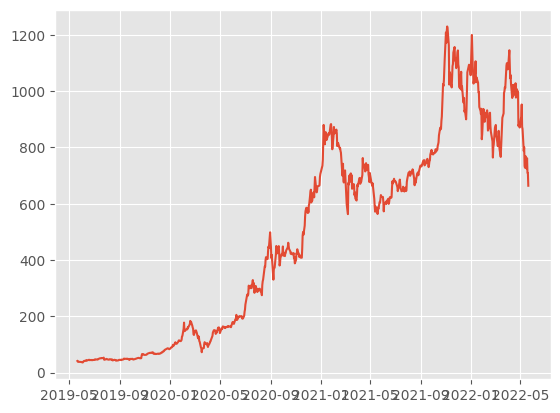

In [ ]:
#plot the 'closing' of the stock
plt.plot(stock_data["Close"])
plt.show()

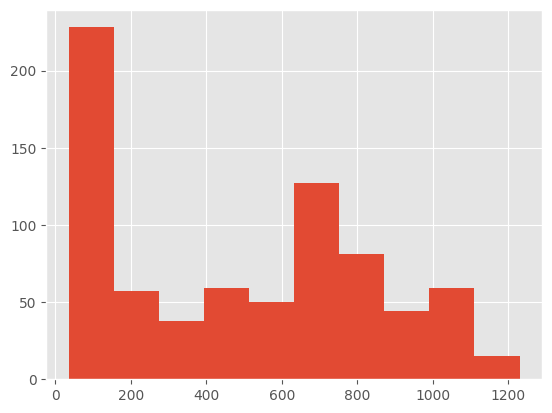

In [ ]:
#plotting histogram of closing of the stock from tesla Co.
plt.hist(stock_data["Close"])
plt.show()

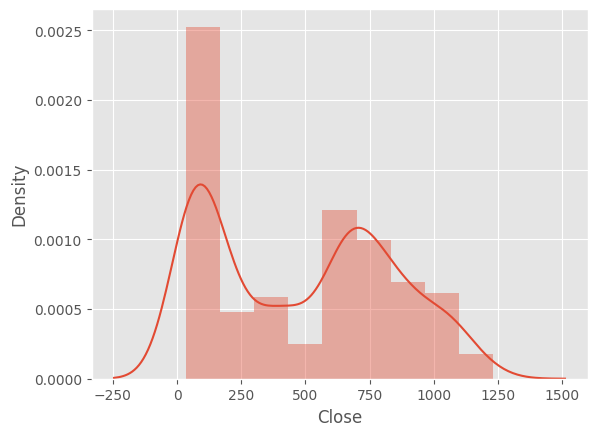

In [ ]:
#plotting the distribution of closed stock
sns.distplot(stock_data["Close"])
plt.show()

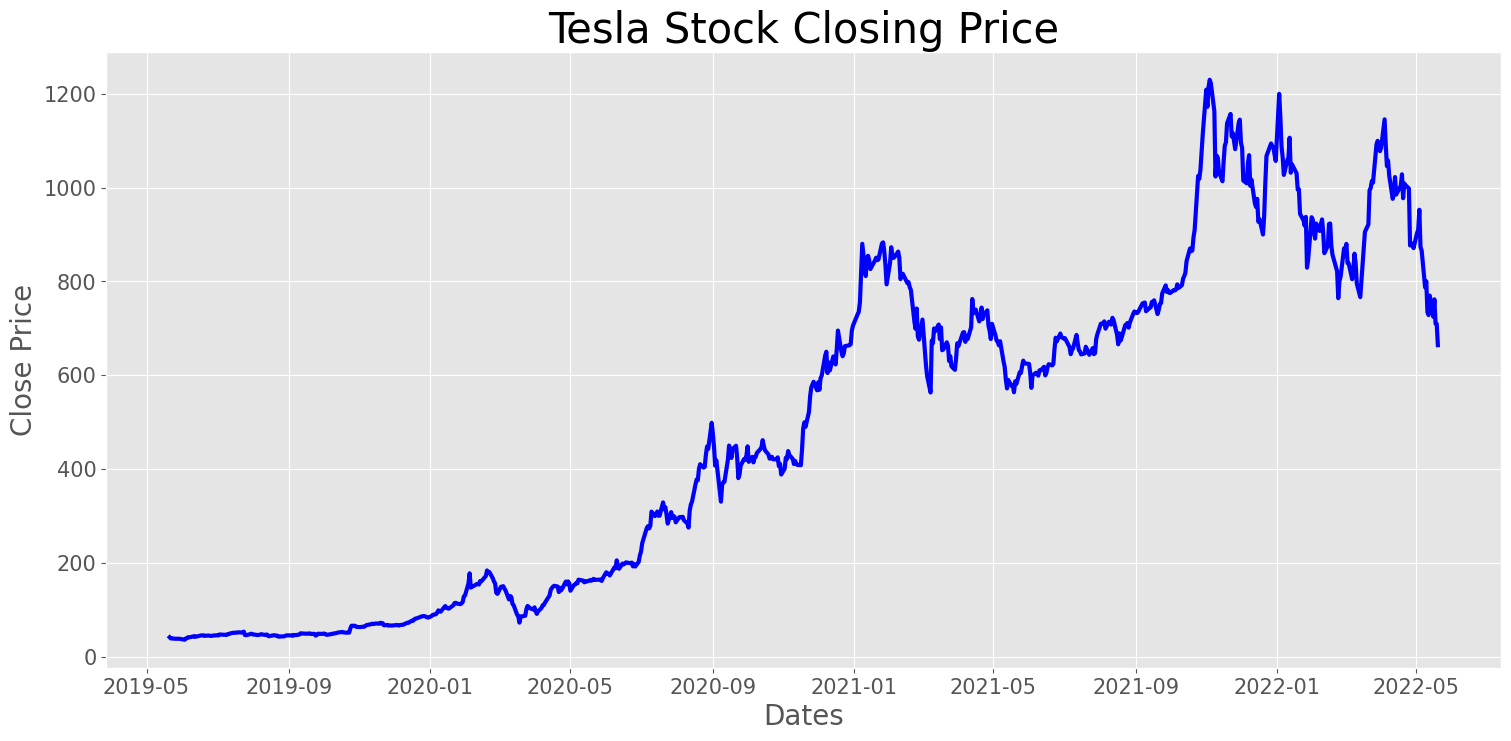

In [ ]:
#plotting the close price of stock
plt.style.use("ggplot")
plt.figure(figsize = (18, 8))
plt.grid(True)
plt.xlabel("Dates", fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel("Close Price", fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(stock_data["Close"], linewidth = 3, color = "blue")
plt.title("Tesla Stock Closing Price", fontsize = 30)
plt.show()

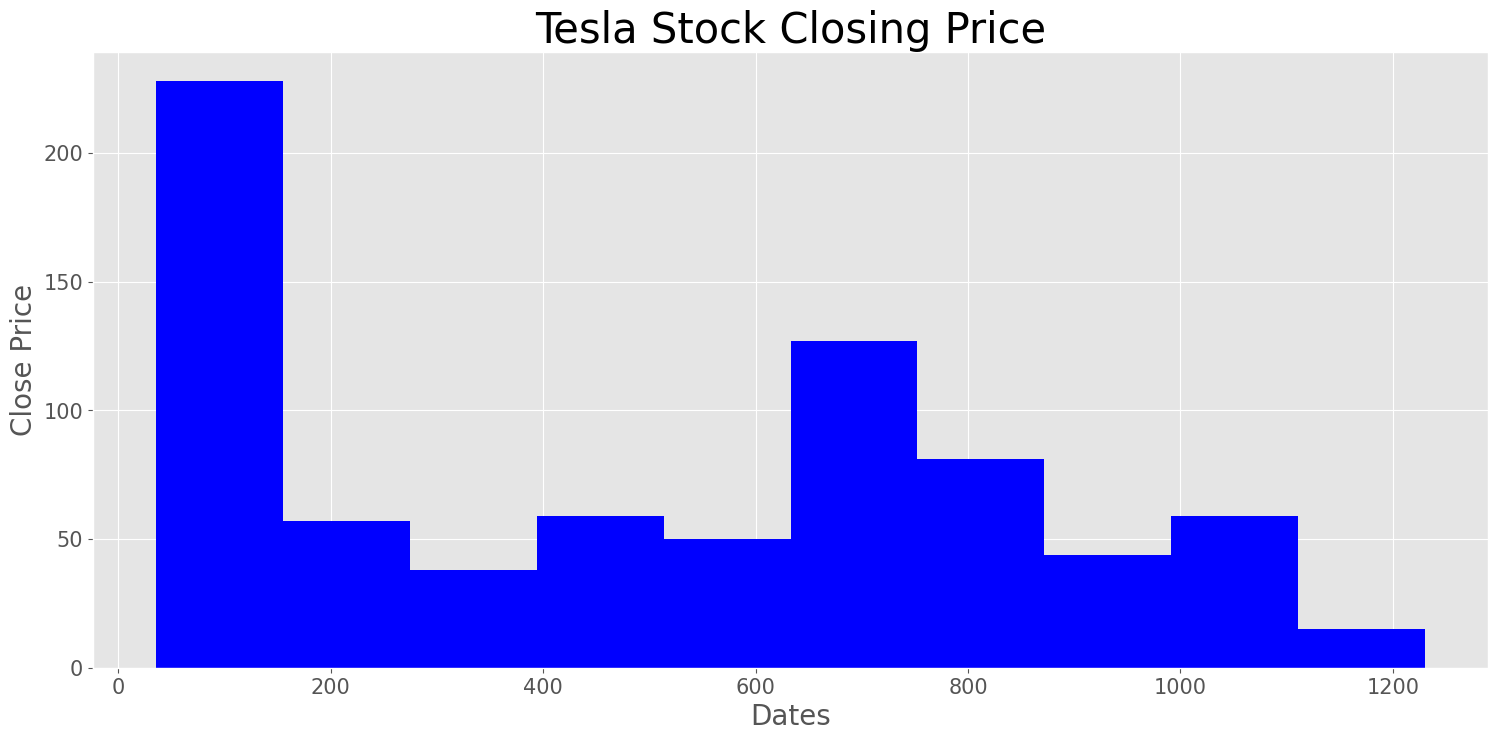

In [ ]:
#plotting histogram of close price
plt.style.use("ggplot")
plt.figure(figsize = (18, 8))
plt.grid(True)
plt.xlabel("Dates", fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel("Close Price", fontsize = 20)
plt.yticks(fontsize = 15)
plt.hist(stock_data["Close"], linewidth = 3, color = "blue")
plt.title("Tesla Stock Closing Price", fontsize = 30)
plt.show()

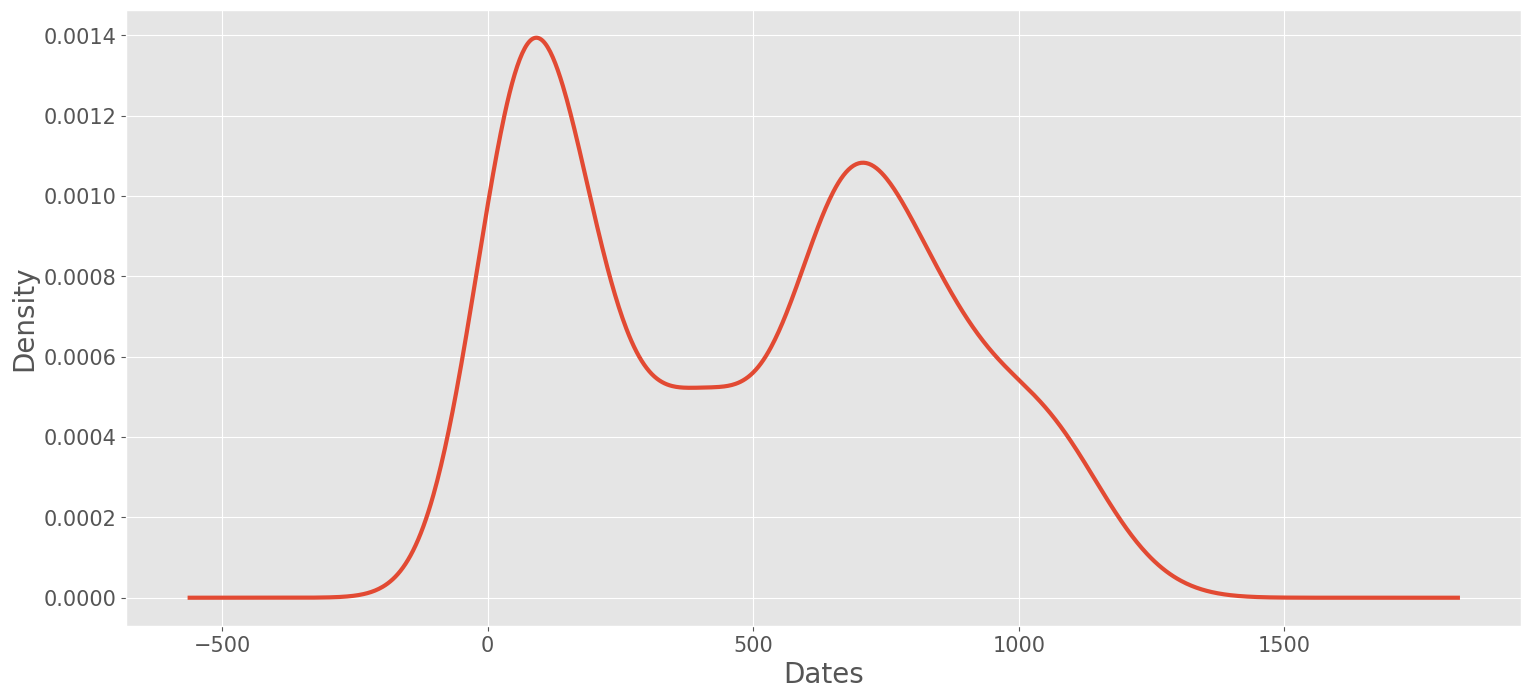

In [ ]:
#distribution plot of the stock price
df_close = stock_data["Close"]
#kernel density estimate (KDE) plot
df_close.plot(kind = "kde", figsize = (18, 8), linewidth = 3)
plt.xlabel("Dates", fontsize = 20)
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel("Density", fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [ ]:
#create mean rolling of stock close price to smooting the line
rolmean = stock_data["Close"].rolling(13).mean()
rolstd = stock_data["Close"].rolling(13).std()
print(rolmean, rolstd)

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    830.393850
2022-05-17    821.478464
2022-05-18    809.097694
2022-05-19    794.211538
2022-05-20    775.338463
Name: Close, Length: 758, dtype: float64 Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23          NaN
2019-05-24          NaN
2019-05-28          NaN
                ...    
2022-05-16    76.844723
2022-05-17    77.641983
2022-05-18    81.847328
2022-05-19    80.950767
2022-05-20    80.494852
Name: Close, Length: 758, dtype: float64


[]

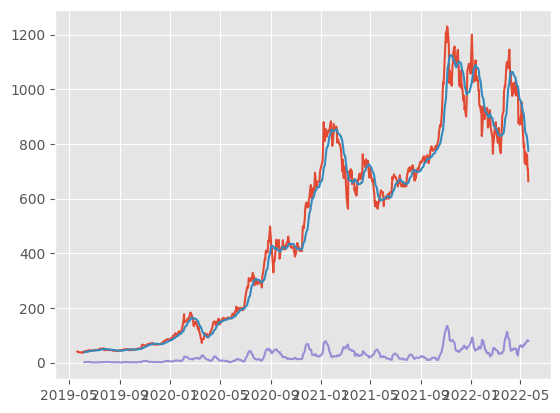

In [ ]:
plt.plot(stock_data["Close"])
plt.plot(rolmean)
plt.plot(rolstd)
plt.plot()

### if we increase the rolling number, the mean and std. variance line will be more smooth compare to above plot

In [ ]:
#create mean rolling of stock close price to smooting the line
rolmean = stock_data["Close"].rolling(360).mean()
rolstd = stock_data["Close"].rolling(360).std()
print(rolmean, rolstd)

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    814.716692
2022-05-17    815.090415
2022-05-18    815.367692
2022-05-19    815.560998
2022-05-20    815.646137
Name: Close, Length: 758, dtype: float64 Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    163.611376
2022-05-17    163.334984
2022-05-18    163.070348
2022-05-19    162.902844
2022-05-20    162.815282
Name: Close, Length: 758, dtype: float64


[]

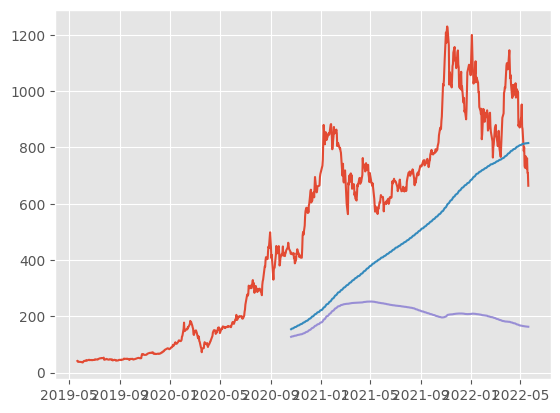

In [ ]:
plt.plot(stock_data["Close"])
plt.plot(rolmean)
plt.plot(rolstd)
plt.plot()

In [ ]:
#create the adafuller
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data["Close"])
adft

(-1.3630085817037492,
 0.5998762543050696,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [ ]:
#give the name of features of indexes
pd.Series(adft[:4], index = ["test stats", "p value", "lag", "data points"])

test stats      -1.363009
p value          0.599876
lag              9.000000
data points    748.000000
dtype: float64

our aim:

null hypothesis = data is not stationary
- p value = 0.599876

if p < 0.5 then, reject the null hypothesis

if p > 0.5 then, accept the null hypothesis

In [ ]:
#test for statinarity of the data

def test_stationarity(timeseries):
  #determine rolling statistics
  rolmean = timeseries.rolling(12).mean() #rolling mean
  rolstd = timeseries.rolling(12).std() #rolling std

  #plot the rolling statistics
  plt.figure(figsize = (18, 8))
  plt.grid("both")
  plt.plot(timeseries, color = "blue", label = "Original", linewidth = 3)
  plt.plot(rolmean, color = "red", label = "Rolling Mean", linewidth = 3)
  plt.plot(rolstd, color = "black", label = "Rolling std", linewidth = 4)
  plt.legend(loc = "best", fontsize = 20, shadow = True, facecolor = "lightpink", edgecolor = "k")
  plt.title("Rolling mean and std deviation", fontsize = 25)
  plt.xticks(fontsize = 15)
  plt.yticks(fontsize = 15)
  plt.show(block = False)

  print("Result of dickey fuller test")
  adft = adfuller(timeseries, autolag = "AIC")

  output = pd.Series(adft[:4], index = ["Test statistics", "p value", "no of lag used", "number of obs. used"])
  for key, values in adft[4].items():
    output["critical value (%s)" %key] = values
  print(output)

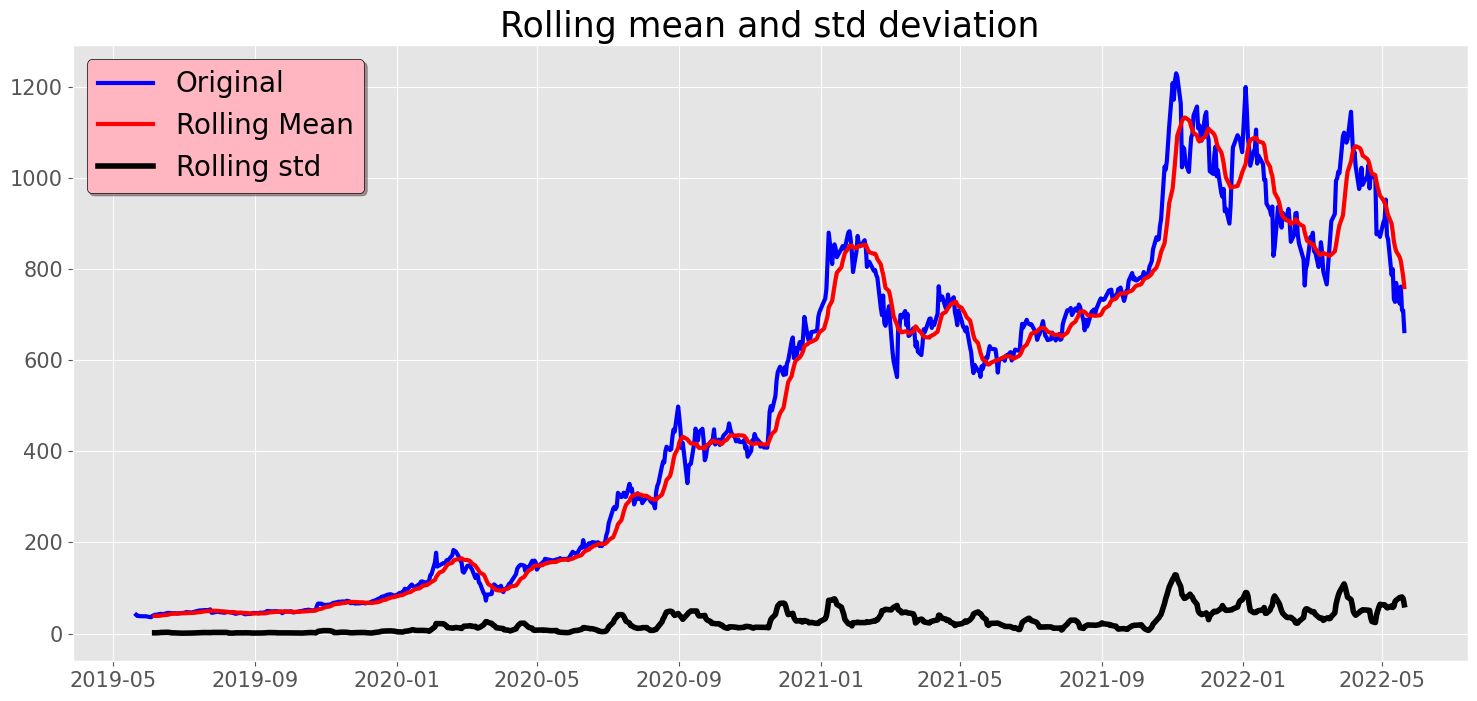

Result of dickey fuller test
Test statistics          -1.363009
p value                   0.599876
no of lag used            9.000000
number of obs. used     748.000000
critical value (1%)      -3.439123
critical value (5%)      -2.865412
critical value (10%)     -2.568832
dtype: float64


In [ ]:
test_stationarity(stock_data.Close)

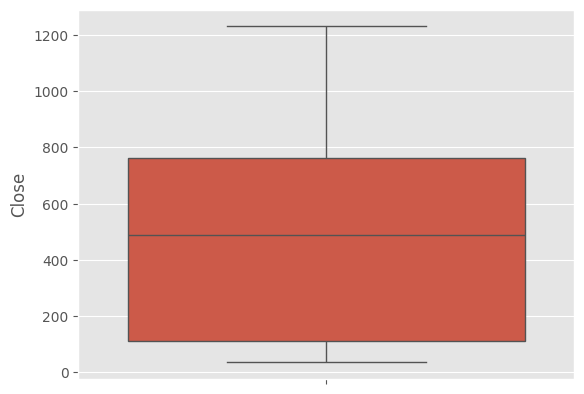

In [ ]:
#box plot for checking the outliers
sns.boxplot(stock_data["Close"])
plt.show()

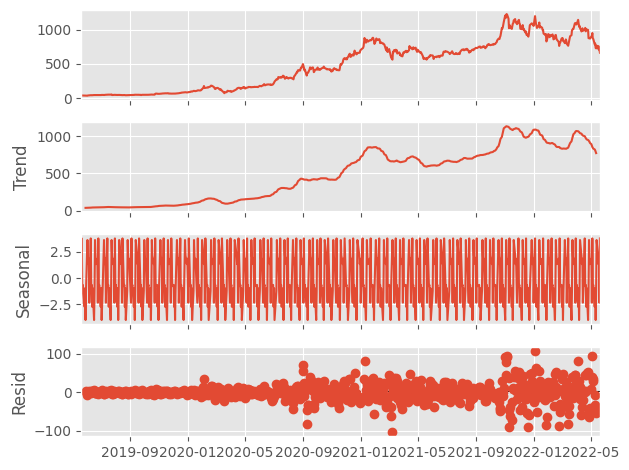

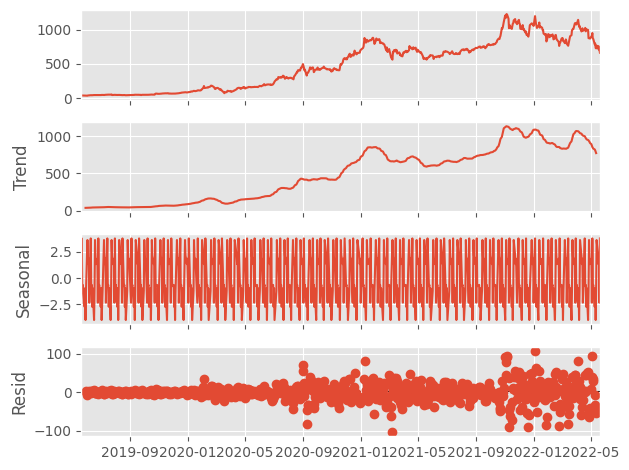

In [ ]:
#time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(stock_data[["Close"]], period = 12)
result.plot()

In [ ]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

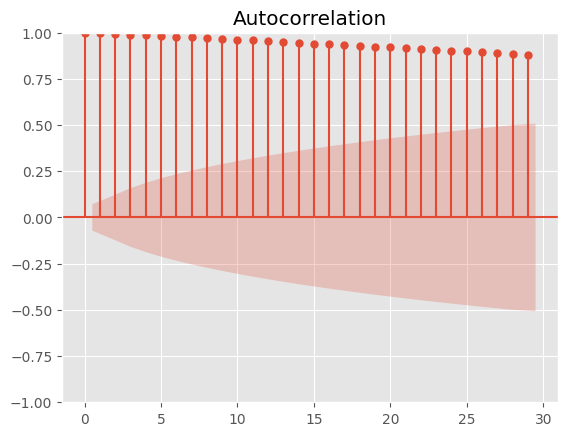

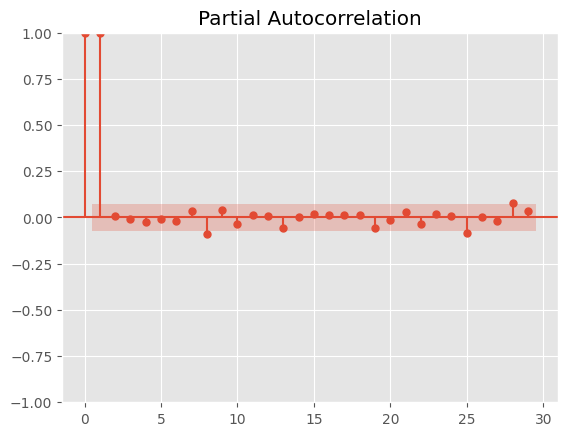

In [ ]:
#plot the ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(stock_data["Close"])
plot_pacf(stock_data["Close"])
plt.show()


## Preprocessing of the data
1. fill the missing data
1. convert data into stationary time series
1. if necessary then normalize the data
1. split the data into train and test data
1. clean the data by removing the outliers

In [ ]:
df_close = stock_data["Close"].diff().dropna()
df_close

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 757, dtype: float64

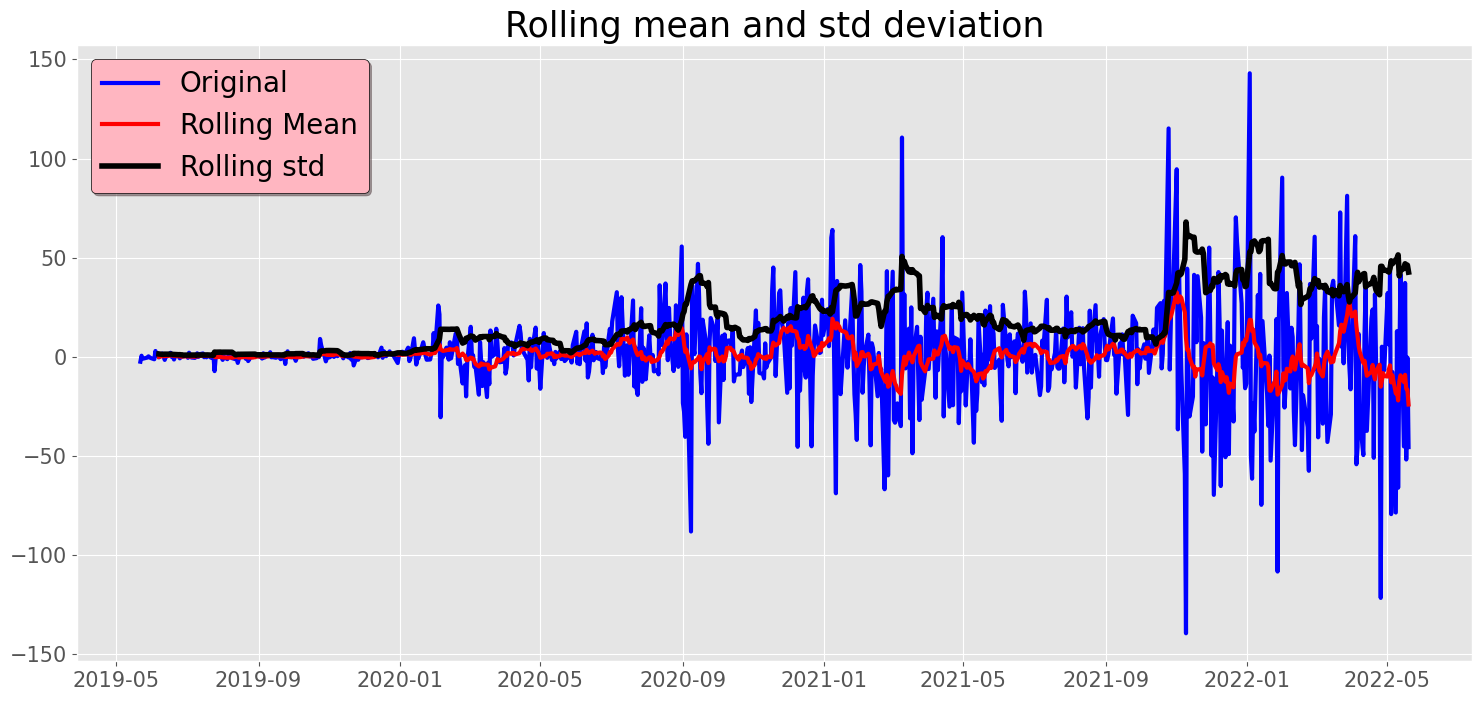

Result of dickey fuller test
Test statistics        -8.324564e+00
p value                 3.498786e-13
no of lag used          8.000000e+00
number of obs. used     7.480000e+02
critical value (1%)    -3.439123e+00
critical value (5%)    -2.865412e+00
critical value (10%)   -2.568832e+00
dtype: float64


In [ ]:
test_stationarity(df_close)

In [ ]:
df_close[: - 60]

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-02-17   -47.040039
2022-02-18   -19.369995
2022-02-22   -35.449951
2022-02-23   -57.490051
2022-02-24    36.730042
Name: Close, Length: 697, dtype: float64

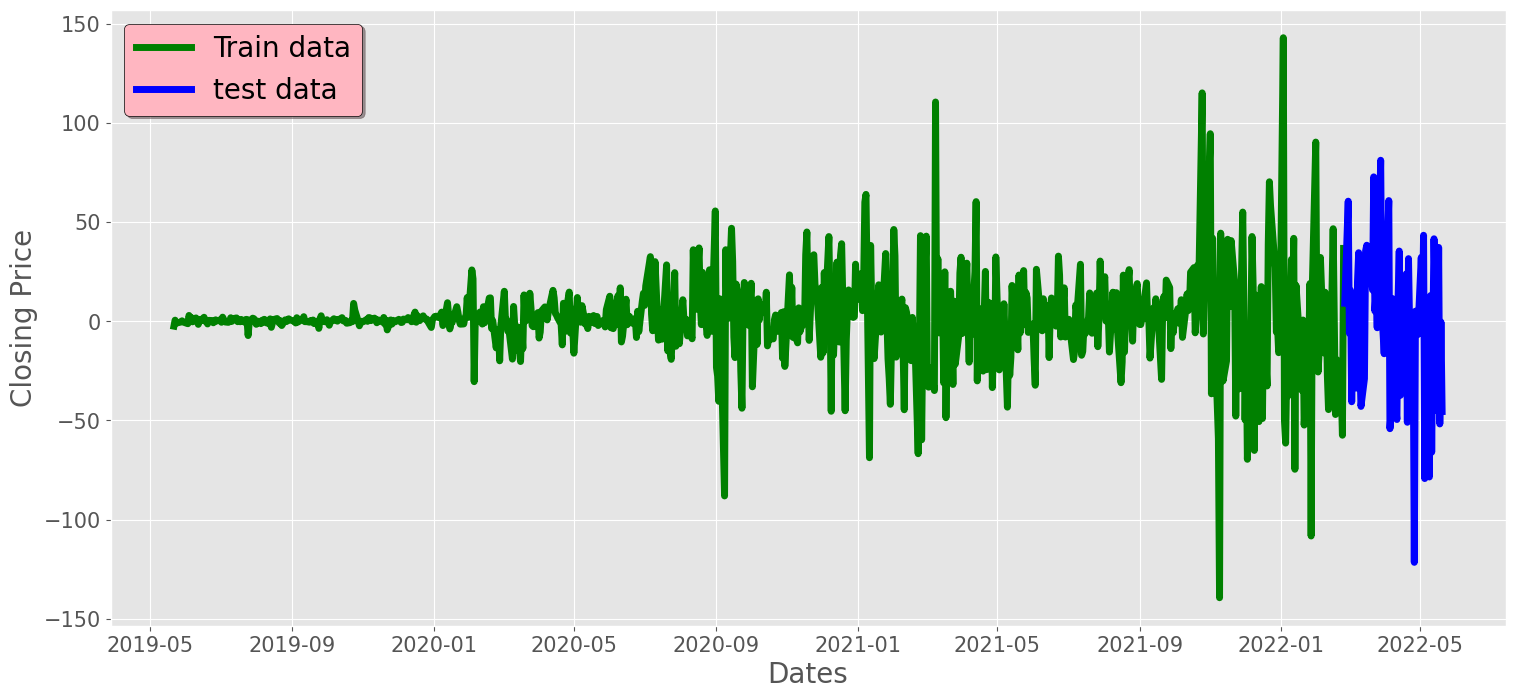

In [ ]:
#split the dagta into train and test dataset
train_data = df_close[:-60]
test_data = df_close[-60:]
plt.figure(figsize = (18, 8))
plt.grid(True)

plt.xlabel("Dates", fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel("Closing Price", fontsize = 20)
plt.yticks(fontsize = 15)

plt.plot(train_data, "green", label = "Train data", linewidth = 5)
plt.plot(test_data, "blue", label = "test data", linewidth = 5)
plt.legend(fontsize = 20, shadow = True, facecolor = "lightpink", edgecolor = "k")

In [ ]:
train_data.shape, test_data.shape

((697,), (60,))

we find that there are 697 train data and last 60 datapoints are test data

In [ ]:
#import the libaries
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
#create the history data
history = [x for x in train_data]

In [ ]:
#create the model with specific order for test purpose
model = ARIMA(history, order = (1, 1, 1))

#fit the model
model = model.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  697
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3148.870
Date:                Sun, 17 Mar 2024   AIC                           6303.741
Time:                        16:42:29   BIC                           6317.377
Sample:                             0   HQIC                          6309.013
                                - 697                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0285      0.025     -1.150      0.250      -0.077       0.020
ma.L1         -0.9991      0.012    -81.341      0.000      -1.023      -0.975
sigma2       493.6006     12.978     38.035      0.000     468.165     519.036
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2092.37
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              31.85   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model.forecast()

array([0.04741687])

In [ ]:
mean_squared_error([test_data[0]], model.forecast())

81.94881931903844

In [ ]:
np.sqrt(mean_squared_error([test_data[0]], model.forecast()))

9.052558716685489

In [ ]:
def evaluate_arima_model(X, y, arima_order):
  #prepare training datast
  history = [x for x in X]
  predictions = list()

  #create the models and fit with new orders
  for t in range(len(y)):
    model = ARIMA(history, order = arima_order)
    model_fit = model.fit()
    #predict the future datapoints
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(y[t])

  #calculate the sample error
  rmse = np.sqrt(mean_squared_error(y, predictions))
  return rmse

In [ ]:
#evaluate the different combination of p, q and d values for ARIMA model to get best order for ARIMA model
def evaluate_models(dataset, test, p_values, d_values, q_values):
  dataset = dataset.astype("float32")
  best_score, best_cfg = float("inf"), None

  for p in p_values:
      for d in d_values:
          for q in q_values:
              order = (p, d, q)
              try:
                  rmse = evaluate_arima_model(dataset, test, order)
                  if rmse < best_score:
                      best_score, best_cfg = rmse, order
                  print("ARIMA%s RMSE = %.3f" %(order, rmse))
              except:
                  continue

  print("Best ARIMA%s RMSE = %.3f" % (best_cfg, best_score))

In [ ]:
import warnings
warnings.filterwarnings("ignore")

p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE = 39.610
ARIMA(0, 0, 1) RMSE = 39.578
ARIMA(0, 0, 2) RMSE = 39.728
ARIMA(0, 1, 0) RMSE = 57.835
ARIMA(0, 1, 1) RMSE = 39.611
ARIMA(0, 1, 2) RMSE = 39.580
ARIMA(0, 2, 0) RMSE = 104.683
ARIMA(0, 2, 1) RMSE = 57.876
ARIMA(0, 2, 2) RMSE = 39.615
ARIMA(1, 0, 0) RMSE = 39.570
ARIMA(1, 0, 1) RMSE = 39.636
ARIMA(1, 0, 2) RMSE = 40.047
ARIMA(1, 1, 0) RMSE = 46.184
ARIMA(1, 1, 1) RMSE = 39.573
ARIMA(1, 1, 2) RMSE = 39.731
ARIMA(1, 2, 0) RMSE = 68.740
ARIMA(1, 2, 1) RMSE = 46.221
ARIMA(1, 2, 2) RMSE = 39.529
ARIMA(2, 0, 0) RMSE = 39.746
ARIMA(2, 0, 1) RMSE = 39.884
ARIMA(2, 0, 2) RMSE = 40.100
ARIMA(2, 1, 0) RMSE = 45.781
ARIMA(2, 1, 1) RMSE = 39.738
ARIMA(2, 1, 2) RMSE = 39.732
ARIMA(2, 2, 0) RMSE = 63.008
ARIMA(2, 2, 1) RMSE = 45.809
Best ARIMA(1, 2, 2) RMSE = 39.529


In [ ]:
history = [x for x in train_data]
predictions = list()

for i in range(len(test_data)):
  #create and fit the model
  model = ARIMA(history, order = (1, 2, 2))
  model = model.fit()

  #predict the model
  fc = model.forecast(alpha = 0.05)
  predictions.append(fc)
  history.append(test_data[i])

print(f"my RMSE {np.sqrt(mean_squared_error(test_data, predictions))}")

my RMSE 39.55330316069596


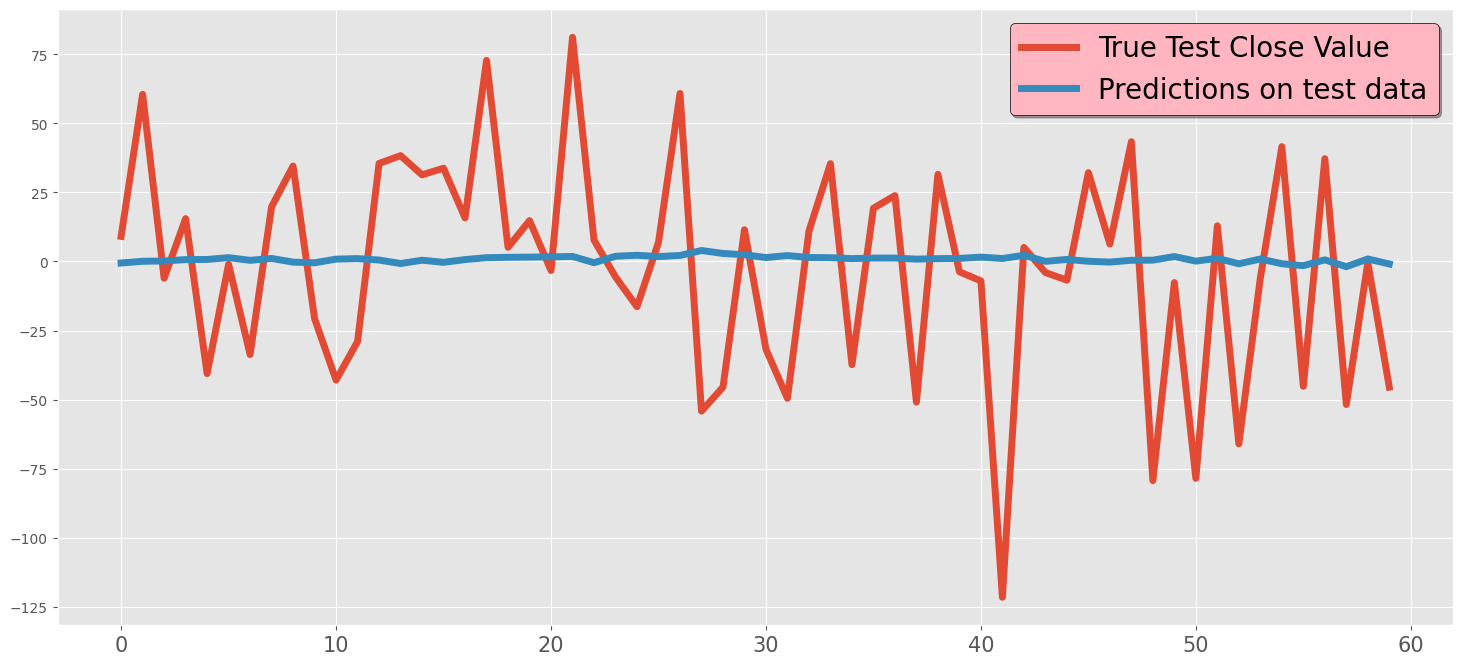

In [ ]:
#plot the data with above order
plt.figure(figsize = (18, 8))
plt.grid(True)
plt.plot(range(len(test_data)), test_data, label = "True Test Close Value", linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = "Predictions on test data", linewidth = 5)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow = True, facecolor = "lightpink", edgecolor = 'k')
plt.show()

In [ ]:
fc_series = pd.Series(predictions, index = test_data.index)

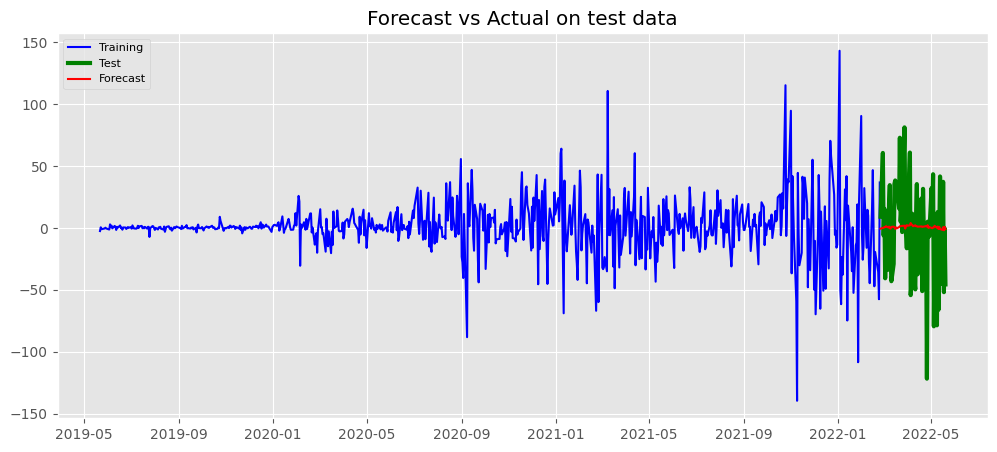

In [ ]:
#plot the data
plt.figure(figsize = (12, 5), dpi = 100)
plt.plot(train_data, label = "Training", color = "blue")
plt.plot(test_data, label = "Test", color = "green", linewidth = 3)
plt.plot(fc_series, label = "Forecast", color = "red")
plt.title("Forecast vs Actual on test data")
plt.legend(loc = "upper left", fontsize = 8)
plt.show()

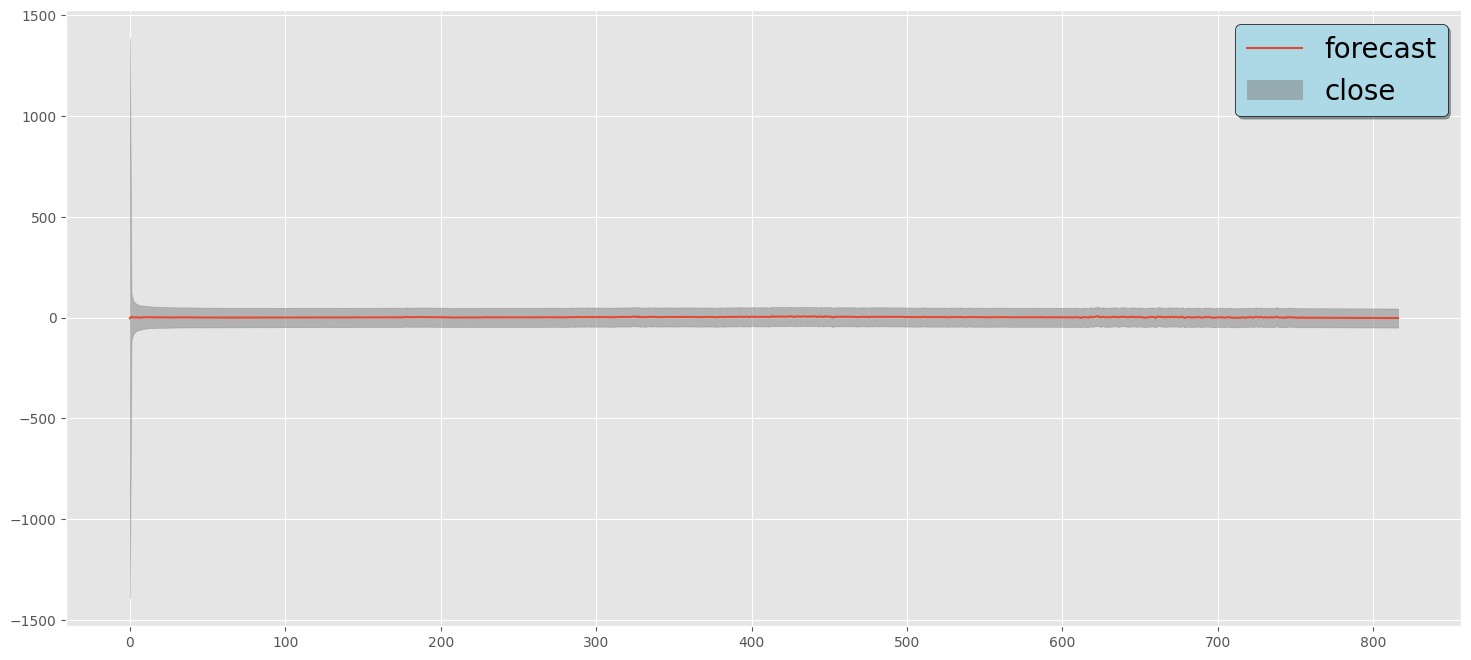

In [ ]:
#plot prediction data with confidence interval
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize = (18, 8))
ax1 = fig.add_subplot(111)
plot_predict(result = model, start = 1, end = len(df_close) + 60, ax = ax1)
plt.grid("both")
plt.legend(["forecast", "close", "95% confidence interval"], fontsize = 20, shadow = True,
           facecolor = "lightblue", edgecolor = 'k')
plt.show()

In [ ]:
#evaluate parameters
import warnings
warnings.filterwarnings("ignore")
history = [x for x in train_data]
predictions = list()
conf_list = list()

for t in range(len(test_data)):
  model = sm.tsa.statespace.SARIMAX(history, order = (1, 2, 2), seasonal_order = (1, 1, 1, 3))
  model_fit = model.fit()
  fc = model_fit.forecast()
  predictions.append(fc)
  history.append(test_data[t])

print("RMSE of SARIMA Model : ", np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model :  40.455595244953365
